# Problem Statement of East AirLines 

In [2]:
#(Perform clustering (hierarchical,K means clustering and DBSCAN))
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
EA = pd.read_excel("F://RStudio//excelR//assignments//assignment 7//clustering//EastWestAirlines.xlsx",'data')
EA.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


# EDA

In [4]:
EA.shape

(3999, 12)

In [5]:
EA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
EA.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# rename cloumn name
EA = EA.rename({'ID#':'ID','Award?':'Award'},axis=1)
EA

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
EA.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<AxesSubplot:>

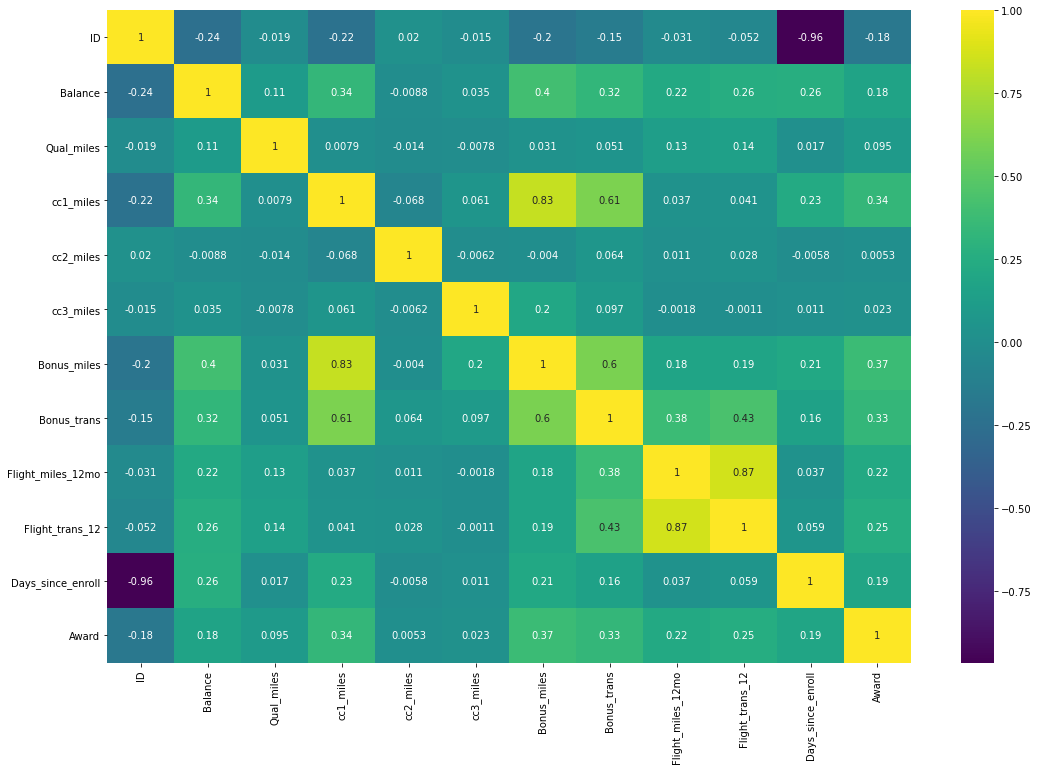

In [9]:
import seaborn as sns
plt.figure(figsize=(18,12))
sns.heatmap(EA.corr(),annot=True,cmap='viridis')

In [10]:
EA.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

<AxesSubplot:>

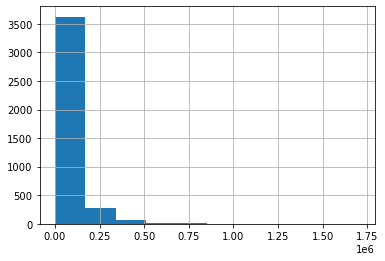

In [11]:
# histogram of Balance
EA['Balance'].hist()

In [12]:
#Descriptive stat
EA['Balance'].describe()

count    3.999000e+03
mean     7.360133e+04
std      1.007757e+05
min      0.000000e+00
25%      1.852750e+04
50%      4.309700e+04
75%      9.240400e+04
max      1.704838e+06
Name: Balance, dtype: float64

<AxesSubplot:>

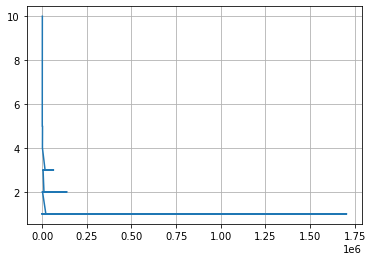

In [13]:
EA['Balance'].value_counts().plot(grid=True)

<AxesSubplot:>

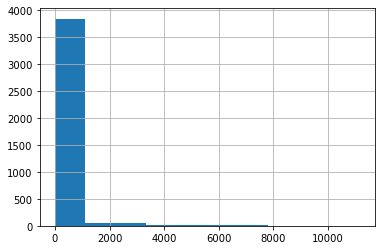

In [14]:
# histogram of Qual_miles
EA['Qual_miles'].hist(grid= True)

<AxesSubplot:>

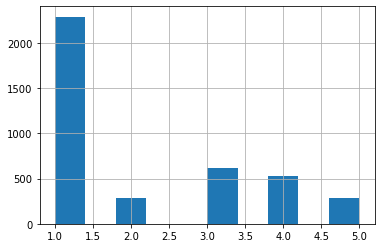

In [15]:
# histogram of cc1_miles
EA['cc1_miles'].hist()

In [16]:
EA['cc1_miles'].value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

<AxesSubplot:>

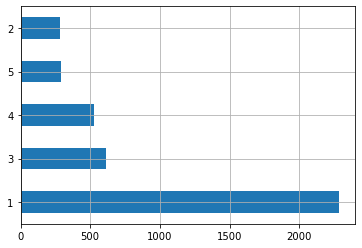

In [17]:
EA['cc1_miles'].value_counts().plot(kind='barh',grid=True)

<AxesSubplot:>

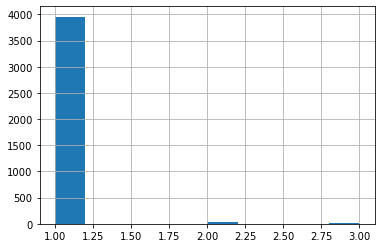

In [18]:
# histogram of cc2_miles
EA['cc2_miles'].hist()

<AxesSubplot:>

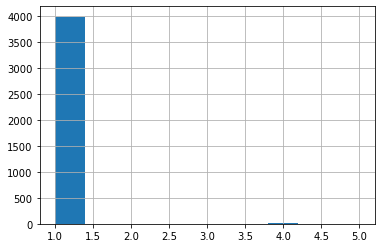

In [19]:
# histogram of cc3_miles
EA['cc3_miles'].hist()

In [20]:
EA['cc3_miles'].value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

<AxesSubplot:>

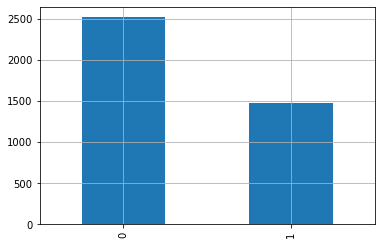

In [21]:
EA['Award'].value_counts().plot(kind='bar',grid=True)

In [22]:
EA['Award'].value_counts()

0    2518
1    1481
Name: Award, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_miles', ylabel='Density'>

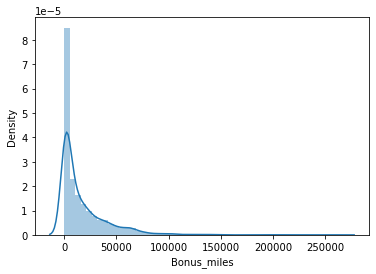

In [23]:
sns.distplot(EA['Bonus_miles'])

# Scatter plot and correlation analysis

In [24]:
# Seaborn visualization library
# Create the default pairplot
#sns.pairplot(EA)

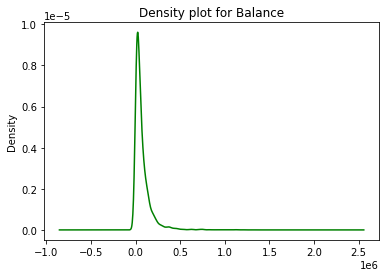

In [25]:
# using plot.density()
EA.Balance.plot.density(color='green')
plt.title('Density plot for Balance')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

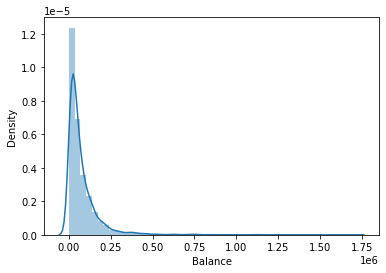

In [26]:
sns.distplot(EA['Balance'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Qual_miles', ylabel='Density'>

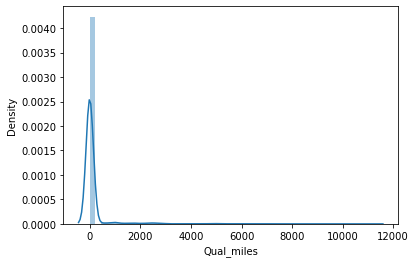

In [27]:
sns.distplot(EA['Qual_miles'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc1_miles', ylabel='Density'>

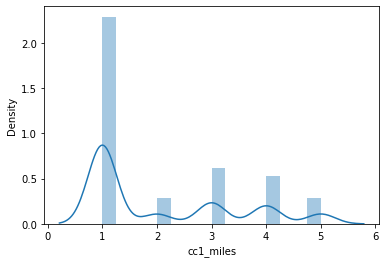

In [28]:
sns.distplot(EA['cc1_miles'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc2_miles', ylabel='Density'>

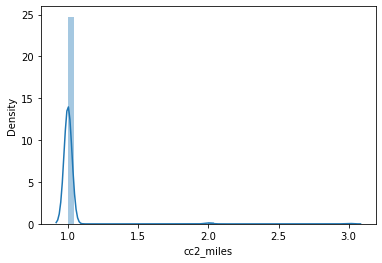

In [29]:
sns.distplot(EA['cc2_miles'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc3_miles', ylabel='Density'>

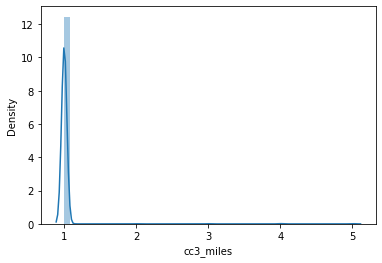

In [30]:
sns.distplot(EA['cc3_miles'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_miles', ylabel='Density'>

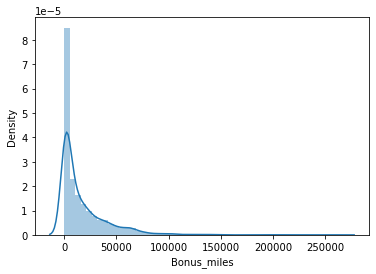

In [31]:
sns.distplot(EA['Bonus_miles'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_trans', ylabel='Density'>

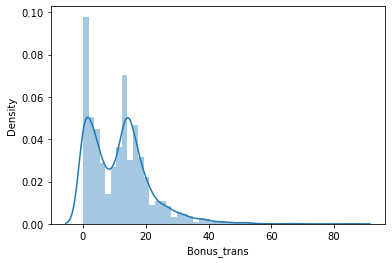

In [32]:
sns.distplot(EA['Bonus_trans'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_miles_12mo', ylabel='Density'>

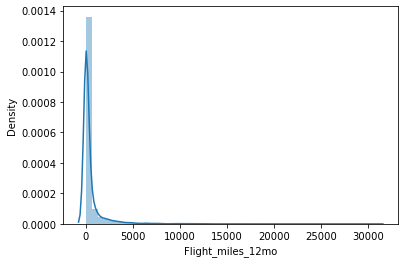

In [33]:
sns.distplot(EA['Flight_miles_12mo'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_trans_12', ylabel='Density'>

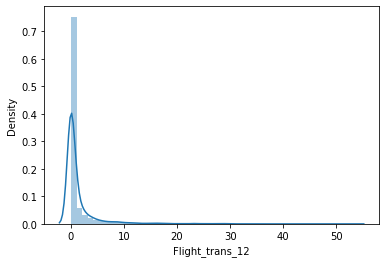

In [34]:
sns.distplot(EA['Flight_trans_12'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days_since_enroll', ylabel='Density'>

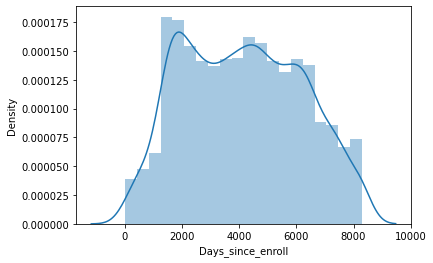

In [35]:
sns.distplot(EA['Days_since_enroll'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Award', ylabel='Density'>

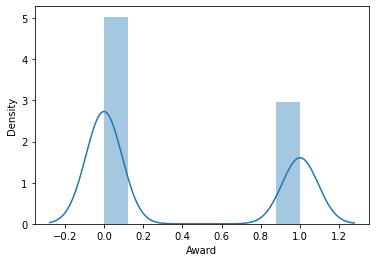

In [36]:
sns.distplot(EA['Award'])

## Normalisation the dataset on East_Airlines

In [37]:
# Normalization function to minimize redundancy (duplicate data) 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [38]:
EA_norm = norm_func(EA.iloc[:,0:])
EA_norm.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Count'>

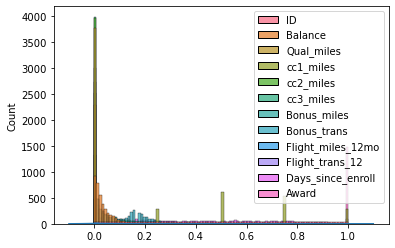

In [39]:
sns.histplot(EA_norm)
sns.distplot(EA_norm)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

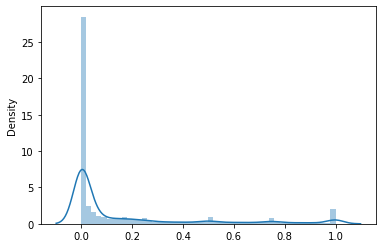

In [40]:
sns.distplot(EA_norm)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

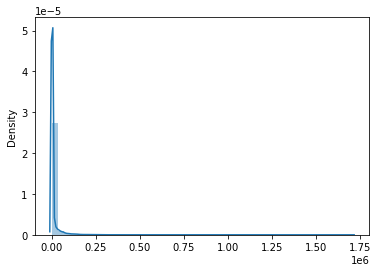

In [41]:
sns.distplot(EA)

In [42]:
EA_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3999 non-null   float64
 1   Balance            3999 non-null   float64
 2   Qual_miles         3999 non-null   float64
 3   cc1_miles          3999 non-null   float64
 4   cc2_miles          3999 non-null   float64
 5   cc3_miles          3999 non-null   float64
 6   Bonus_miles        3999 non-null   float64
 7   Bonus_trans        3999 non-null   float64
 8   Flight_miles_12mo  3999 non-null   float64
 9   Flight_trans_12    3999 non-null   float64
 10  Days_since_enroll  3999 non-null   float64
 11  Award              3999 non-null   float64
dtypes: float64(12)
memory usage: 375.0 KB


In [43]:
EA_norm.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.500950,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.288747,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251119,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.501244,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.751119,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Standardization the dataset on East_Airlines

In [44]:
# Standardization to standardize the range of features of input data set as pre-processing step
def std_func(i):
 x = (i-i.min())/(i.max()-i.min())
 return (x)

In [45]:
EA_std = std_func(EA.iloc[:,0:])
EA_std.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

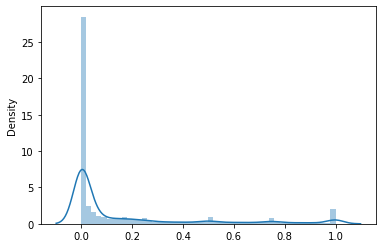

In [46]:
sns.distplot(EA_std)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

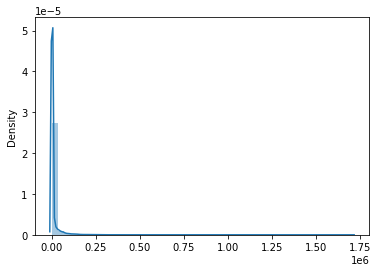

In [47]:
sns.distplot(EA)

# PCA applying on Normal And Standard dataset

PCA on Normalization

In [48]:
from sklearn.decomposition import PCA
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_EA = pca_minmax.fit_transform(EA_norm)

In [49]:
# eigenvalues..
print(pca_minmax.singular_values_)

[33.23903239 23.19486627 19.58010291  6.55453842]


In [50]:
# variance containing in each formed PCA
PCA_normEA = np.cumsum(pca_minmax.explained_variance_ratio_*100)
PCA_normEA
#print(pca_minmax.explained_variance_ratio_*100)

array([51.05215542, 75.91215307, 93.62740274, 95.61259038])

PCA on Standardization

In [51]:
from sklearn.decomposition import PCA
pca_stdEA = PCA(random_state=10, n_components=0.95)
pca_std_EA= pca_stdEA.fit_transform(EA_std)

In [52]:
print(pca_stdEA.singular_values_)

[33.23903239 23.19486627 19.58010291  6.55453842]


# KMeans

In [53]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_EA_df = scaler.fit_transform(EA.iloc[:,1:])
scaled_EA_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

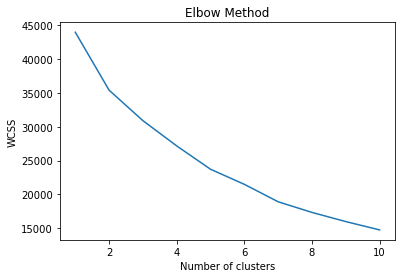

In [54]:
# to find the number of cluster, K-means  algortithm aims to choose the centroid that minimise the inertia,
# or within-cluster sum-of-squares criterion:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_EA_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [109]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_EA_df)

KMeans(n_clusters=4, random_state=42)

In [55]:
# Module yellowbrick cluster importing library  KElbowVisualizer
!pip install yellowbrick

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


model1


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

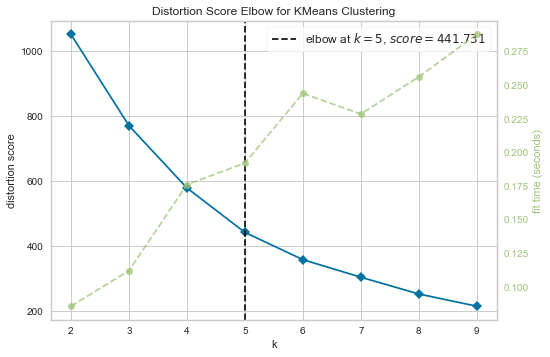

model2


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

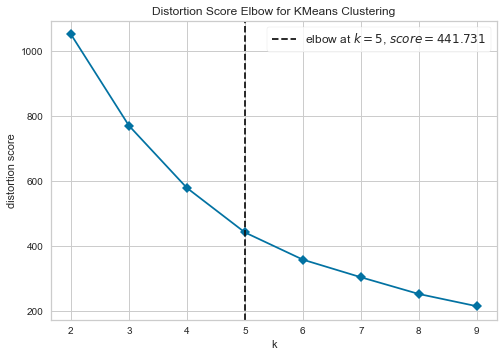

In [56]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='distortion', timings=True)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='distortion', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_EA)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_EA)    
visualizer2.poof()
plt.show()


In [57]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9,]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_EA)
    sil_score1= silhouette_score(pca_std_EA, cluster_labels1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

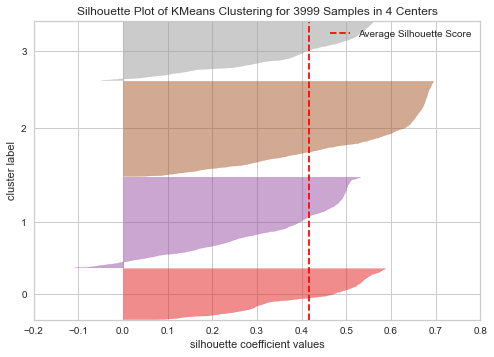

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
# Instantiate the clustering model and visualizer 

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model3 = KMeans(4)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(pca_minmax_EA)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [110]:
 print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 13 The average silhouette_score is : 0.45750466439919946


In [111]:
# Assigning new cluster to the data set
EA_KM = EA.copy()
EA_KM['clust_KM'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.29164389, -0.06132368, -0.60152323,  0.03125746, -0.06076794,
        -0.5117271 , -0.4819973 , -0.18694933, -0.19911352, -0.20166452,
        -0.3467728 ],
       [ 1.19834441,  0.82002725,  0.06242226,  0.14807116, -0.06276658,
         0.58267436,  1.59217228,  3.53177027,  3.79414404,  0.28312709,
         0.9023012 ],
       [ 0.43006424,  0.01841925,  1.20706456, -0.08206289, -0.0546097 ,
         0.92971332,  0.75392632, -0.08287448, -0.09283538,  0.37145869,
         0.58506057],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [112]:
#Build Cluster algorithm
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(EA)

KMeans(n_clusters=5, random_state=42)

In [113]:
clusters_new.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [114]:
clusters_new.cluster_centers_

array([[2.21857697e+03, 2.58628913e+04, 9.90569697e+01, 1.54868687e+00,
        1.01696970e+00, 1.00444444e+00, 8.53967879e+03, 8.65535354e+00,
        2.53638384e+02, 7.87878788e-01, 3.73326949e+03, 3.14343434e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51596023e+03, 2.06267744e+05, 2.99264205e+02, 3.02840909e+00,
        1.00568182e+00, 1.01420455e+00, 3.54881108e+04, 1.82187500e+01,
        1.03951705e+03, 2.90625000e+00, 5.04846591e+03, 4.88636364e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80796335e+03, 9.67306325e+04, 1.64924812e+02, 2.80827068e+00,
        1.01033835e+00, 1.02819549e+00, 2.76563289e+04, 1.54

In [115]:
EA_KM.groupby('clust_KM').agg(['mean']).reset_index()

,clust_KM,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2238.186083,44202.374902,96.865520,1.228694,1.019156,1.000391,4767.366302,6.957780,198.688428,0.619234,3701.567240,0.202111
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1602.838224,116671.953212,157.735131,3.716891,1.002379,1.001586,39498.719270,18.826328,342.704203,1.018239,4882.059477,0.652657
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [116]:
EA_KM

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [117]:
#Dimensionality reduction using PCA
PCA_KM = PCA(n_components=2).fit(EA_std)
PCA_KM_EA = PCA_KM.transform(EA_std)

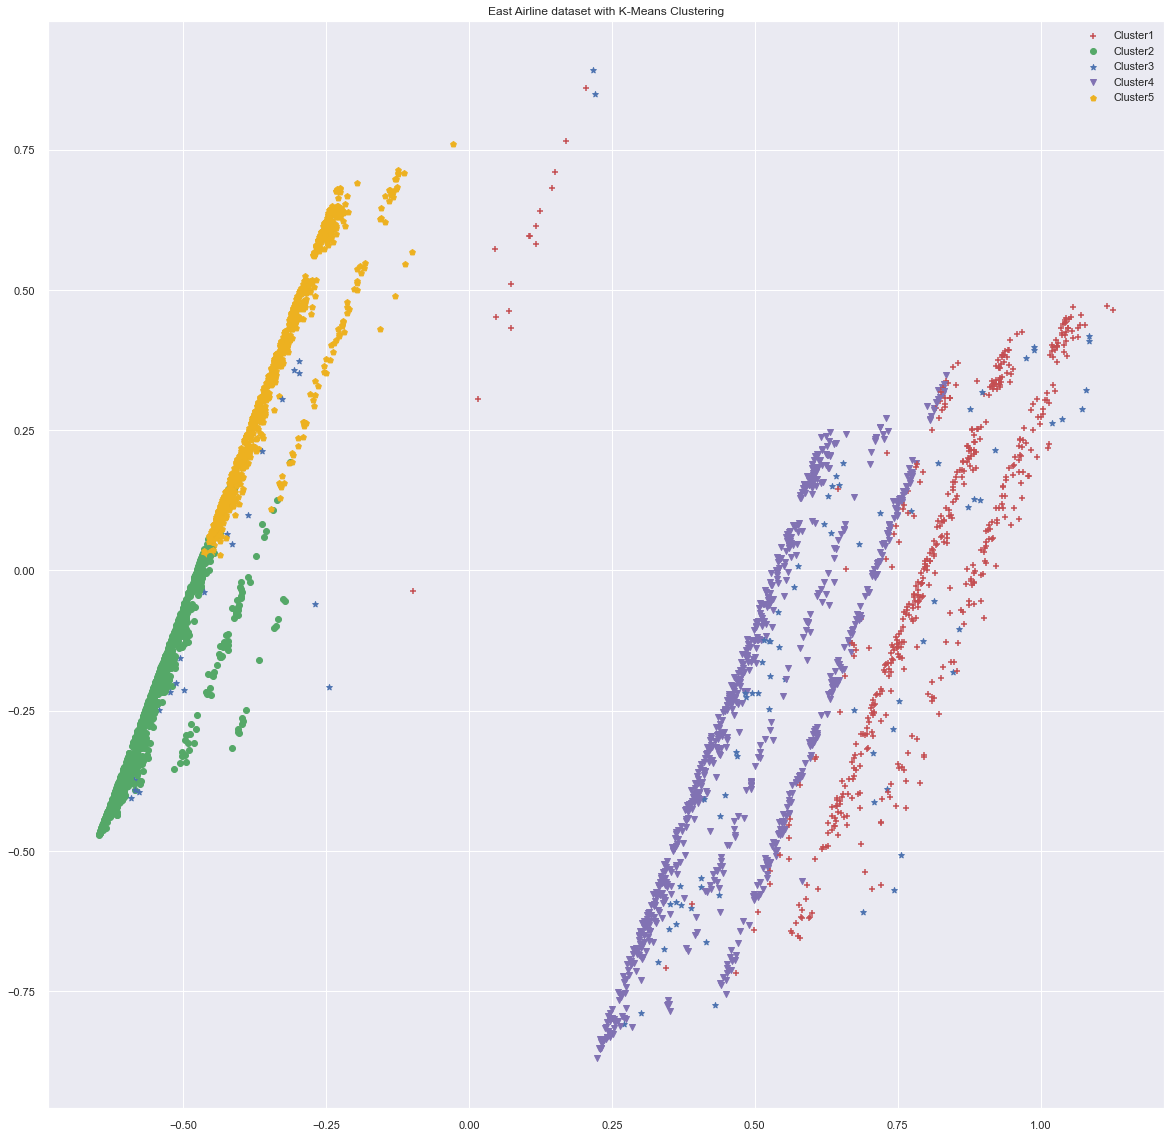

In [118]:
import pylab as pl

sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, PCA_KM_EA.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='m', marker='v')
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2','Cluster3', 'Cluster4','Cluster5'])
pl.title('East Airline dataset with K-Means Clustering')
pl.show()

# DBscan

In [64]:
#importing Library
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
DBSCAN_EA=EA.values
DBSCAN_EA

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [66]:
stscaler = StandardScaler().fit(DBSCAN_EA)
X = stscaler.transform(DBSCAN_EA)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [67]:
dbscan = DBSCAN(eps=5, min_samples=13)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=13)

In [119]:
# Assigning new cluster to the data set
EA_DB = EA.copy()
EA_DB['clust_DB'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[2.21857697e+03, 2.58628913e+04, 9.90569697e+01, 1.54868687e+00,
        1.01696970e+00, 1.00444444e+00, 8.53967879e+03, 8.65535354e+00,
        2.53638384e+02, 7.87878788e-01, 3.73326949e+03, 3.14343434e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51596023e+03, 2.06267744e+05, 2.99264205e+02, 3.02840909e+00,
        1.00568182e+00, 1.01420455e+00, 3.54881108e+04, 1.82187500e+01,
        1.03951705e+03, 2.90625000e+00, 5.04846591e+03, 4.88636364e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80796335e+03, 9.67306325e+04, 1.64924812e+02, 2.80827068e+00,
        1.01033835e+00, 1.02819549e+00, 2.76563289e+04, 1.54

In [120]:
#these are standardized values.
clusters_new.cluster_centers_

array([[2.21857697e+03, 2.58628913e+04, 9.90569697e+01, 1.54868687e+00,
        1.01696970e+00, 1.00444444e+00, 8.53967879e+03, 8.65535354e+00,
        2.53638384e+02, 7.87878788e-01, 3.73326949e+03, 3.14343434e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51596023e+03, 2.06267744e+05, 2.99264205e+02, 3.02840909e+00,
        1.00568182e+00, 1.01420455e+00, 3.54881108e+04, 1.82187500e+01,
        1.03951705e+03, 2.90625000e+00, 5.04846591e+03, 4.88636364e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80796335e+03, 9.67306325e+04, 1.64924812e+02, 2.80827068e+00,
        1.01033835e+00, 1.02819549e+00, 2.76563289e+04, 1.54

In [121]:
stdDB=dbscan.labels_

In [122]:
EA_DB

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


DBscan on PCA

In [123]:
#Dimensionality reduction using PCA
PCA_DB = PCA(n_components=2).fit(EA_std)
PCA_DB_EA = PCA_DB.transform(EA_std)

In [124]:
silhouette_score(EA_norm,stdDB)

0.12988962841811424

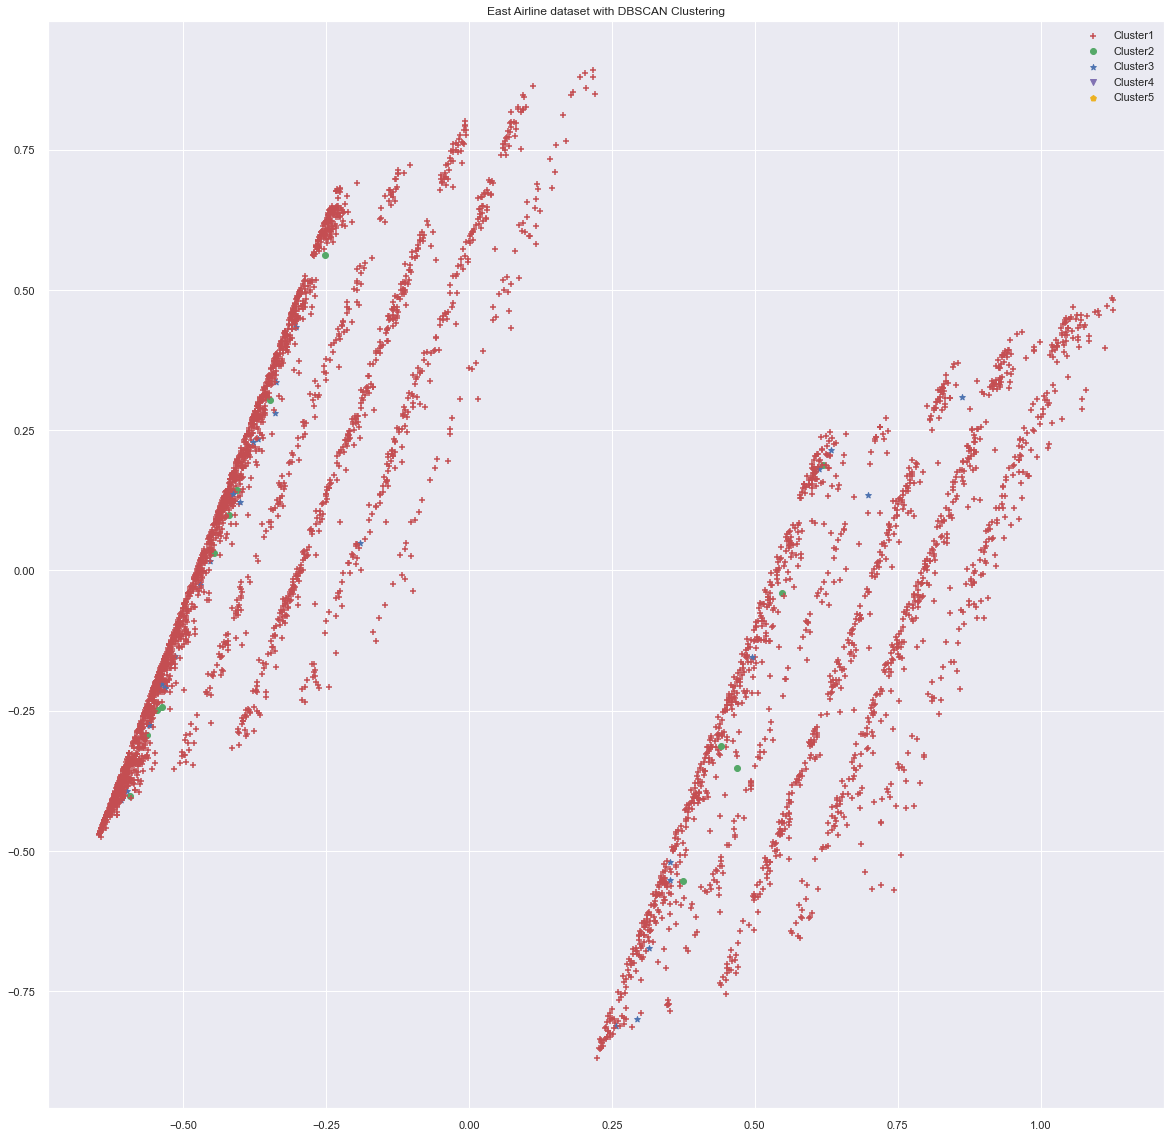

In [125]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, PCA_DB_EA.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='b', marker='*')
    elif dbscan.labels_[i] == 3:
        c4 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='m', marker='v')
    elif dbscan.labels_[i] == 4:
        c5 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3,c4, c5], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5'])
pl.title('East Airline dataset with DBSCAN Clustering')
pl.show()

# Hierarchical Clustering

In [126]:
# Importing Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [54.375, 54.375, 102.5, 102.5],
  [35.0, 35.0, 78.4375, 78.4375],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [235.0, 235.0, 260.0, 260.0],
  [225.0, 225.0, 247.5, 247.5],
  [210.0, 210.0, 236.25, 236.25],
  [167.5, 167.5, 223.125, 223.125],
  [145.0, 145.0, 195.3125, 195.3125],
  [135.0, 135.0, 170.15625, 170.15625],
  [125.0, 125.0, 152.578125, 152.578125],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [455.0, 455.0, 465.0, 465.0],
  [575.0, 575.0, 585.0, 585.0],
  [565.0, 565.0, 580.0, 580.0],
  [555.0, 555.0, 572.5, 572.5],
  [615.0, 615.0, 6

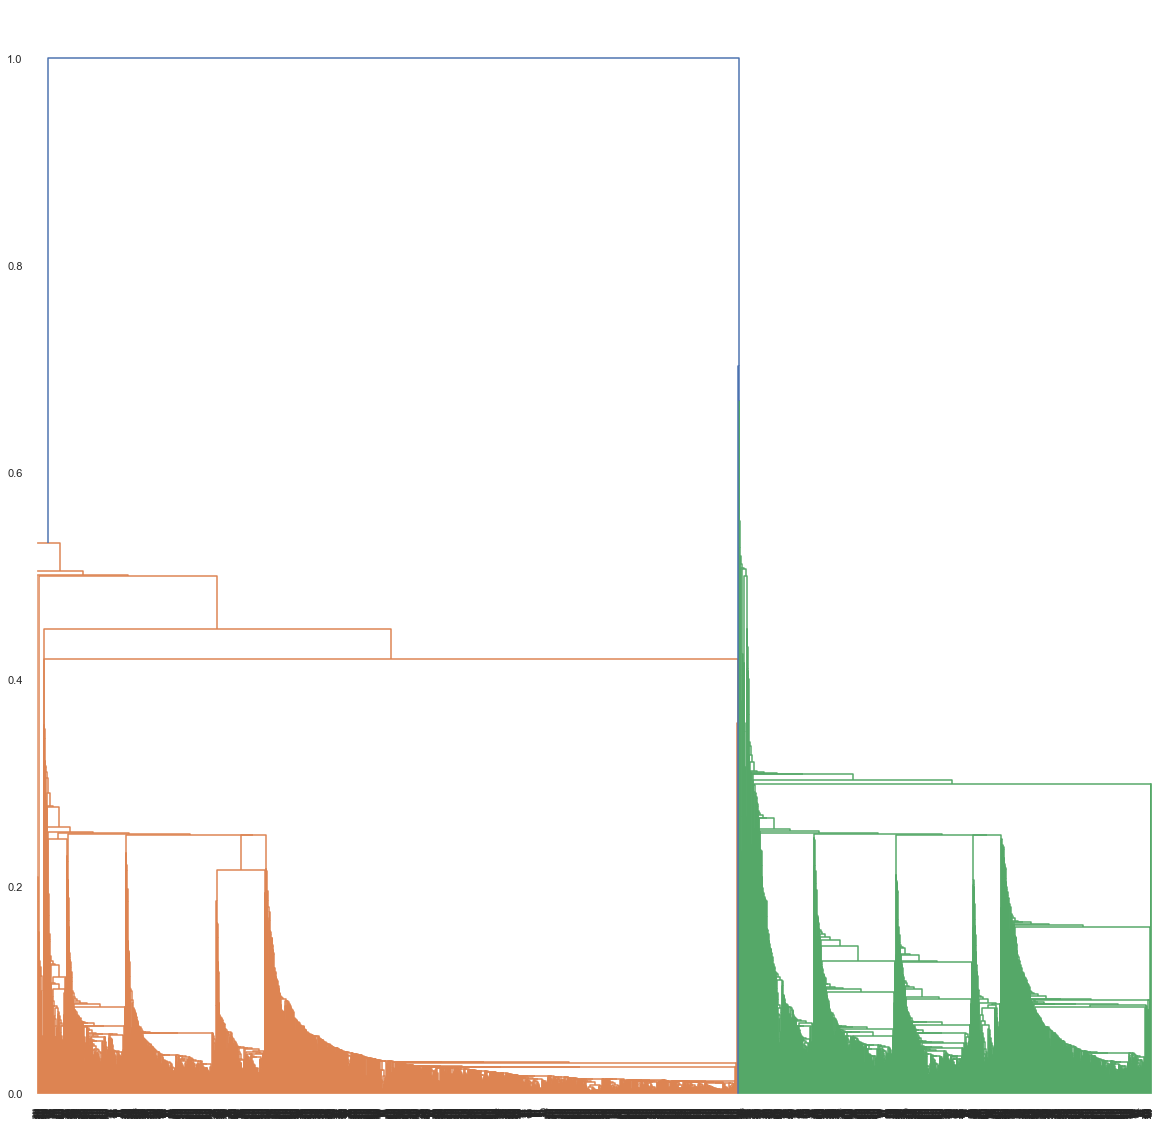

In [127]:
# create dendrogram
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='single'))
dendrogram_EA

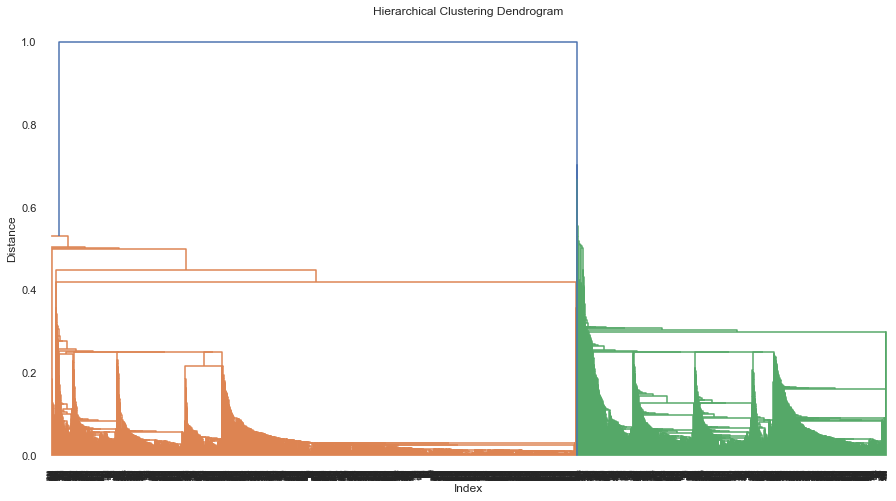

In [128]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='single'))

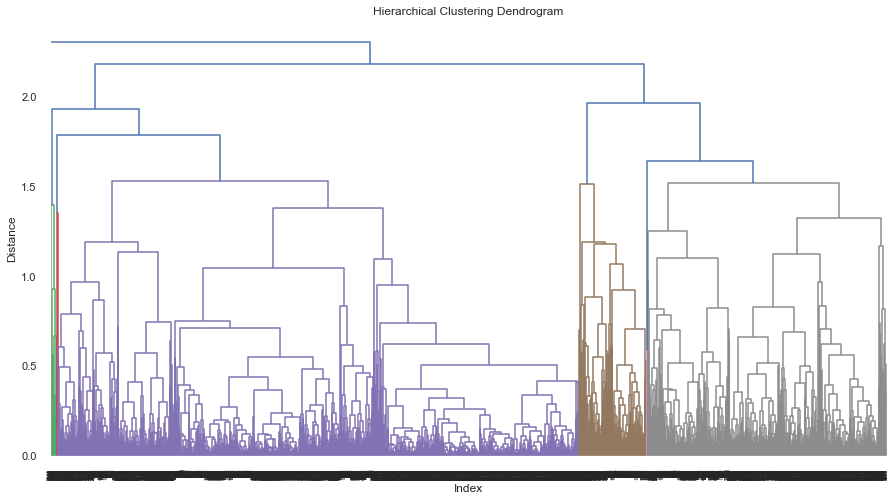

In [129]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='complete'))

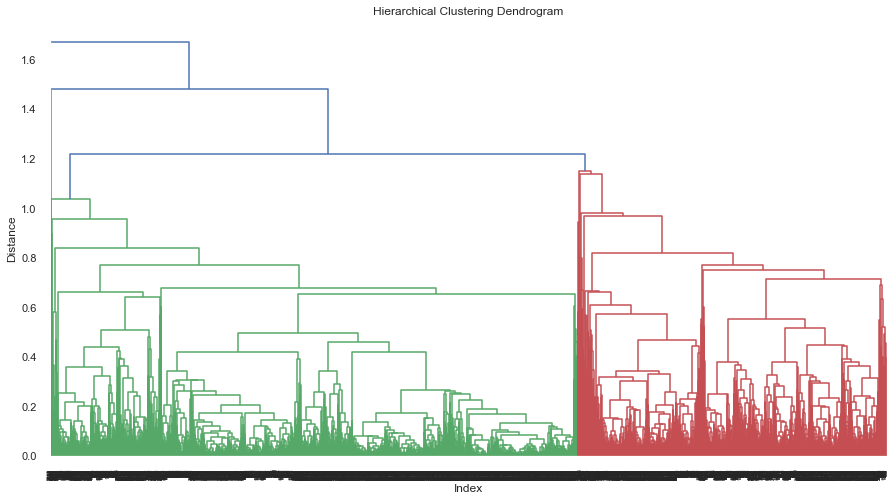

In [130]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='average'))

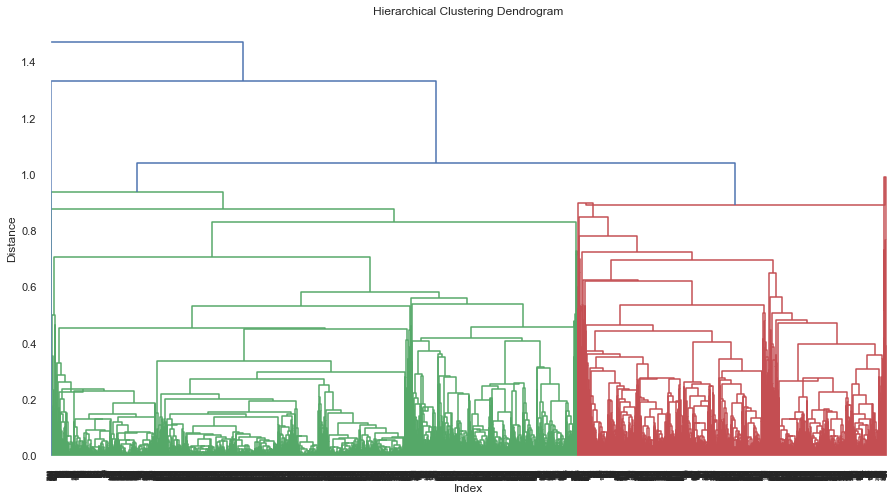

In [131]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='centroid'))

In [132]:
# Assigning new cluster to the data set
EA_HC = EA.copy()
EA_HC['clust_HC'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[2.21857697e+03, 2.58628913e+04, 9.90569697e+01, 1.54868687e+00,
        1.01696970e+00, 1.00444444e+00, 8.53967879e+03, 8.65535354e+00,
        2.53638384e+02, 7.87878788e-01, 3.73326949e+03, 3.14343434e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51596023e+03, 2.06267744e+05, 2.99264205e+02, 3.02840909e+00,
        1.00568182e+00, 1.01420455e+00, 3.54881108e+04, 1.82187500e+01,
        1.03951705e+03, 2.90625000e+00, 5.04846591e+03, 4.88636364e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80796335e+03, 9.67306325e+04, 1.64924812e+02, 2.80827068e+00,
        1.01033835e+00, 1.02819549e+00, 2.76563289e+04, 1.54

In [133]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(EA_norm)

In [134]:
EA_HC.groupby('clust_HC').agg(['mean']).reset_index()

,clust_HC,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2218.167609,25875.256866,99.016963,1.549677,1.016963,1.004443,8550.705170,8.664378,253.737884,0.787964,3733.943053,0.314620
1,1,1050.876404,418790.179775,444.910112,3.235955,1.033708,1.000000,49404.910112,19.831461,1626.303371,5.022472,5935.460674,0.719101
2,2,1516.669516,206421.153846,300.116809,3.028490,1.005698,1.014245,35540.655271,18.213675,1041.054131,2.911681,5047.150997,0.490028
3,3,814.000000,922162.526316,564.736842,3.210526,1.000000,1.157895,58492.052632,20.894737,1607.526316,6.263158,6642.315789,0.894737
4,4,1808.021617,96820.802632,164.924812,2.807331,1.010338,1.028195,27638.663534,15.402256,630.464286,1.836466,4510.212406,0.421992


In [135]:
EA_HC

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [136]:
EA_norm = norm_func(EA.iloc[:,1:])

In [137]:
EA_norm['clust_HC'] = clusters_new.labels_
EA_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_HC
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [138]:
pca_agg = PCA(n_components=2).fit(EA_norm)
pca_hc_agg = pca_agg.transform(EA_norm)

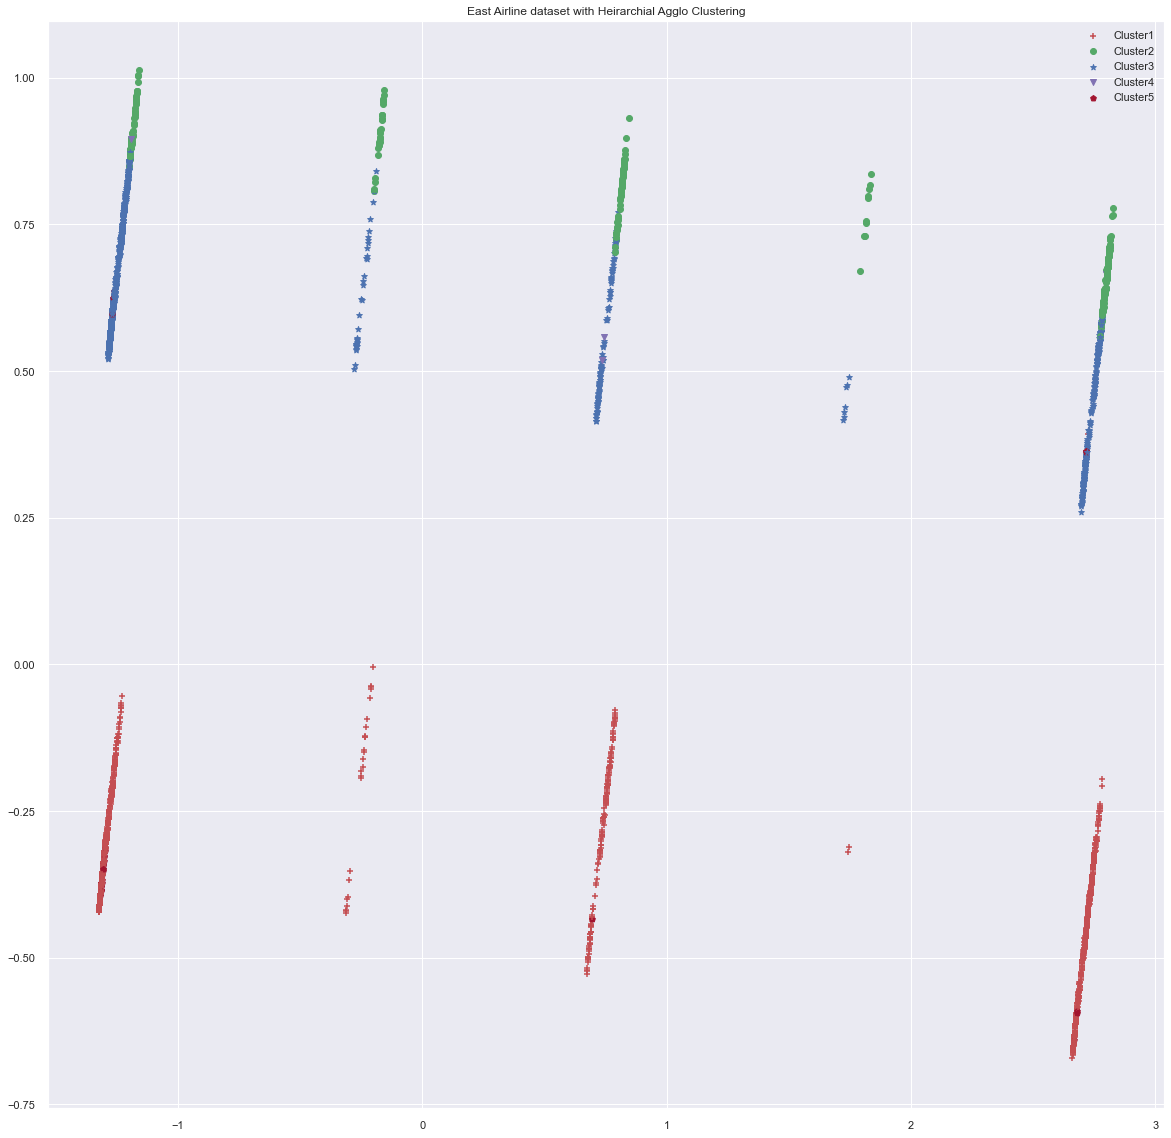

In [139]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_hc_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='b', marker='*')
    elif y_hc[i] == 3:
        c4 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='m', marker='v')
    elif y_hc[i] == 4:
        c5 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='#A2142F', marker='p')
  
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4','Cluster5'])
pl.title('East Airline dataset with Heirarchial Agglo Clustering')
pl.show()

In [140]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]  
for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        Hcluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        HC_labels = Hcluster.fit_predict(pca_std_EA)
        silhouette_score1 = silhouette_score(pca_std_EA, HC_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- single : 0.4898979708990997
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.44097164371244546
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4898979708990997
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4898979708990997

For n_clusters = 3 The average silhouette_score with linkage- single : 0.4685092099562147
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.48755786490179653
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46390248717401517
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3813260038022784

For n_clusters = 4 The average silhouette_score with linkage- single : 0.4686094382926014
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.43430088381361565
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4424737263379363

In [141]:
EA_HC

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Result : I  Applied all(Hierarchical,KMeans,DBscan) Clustering Algorithm in above dataset of East West Airlines from that  I got five clusters and High Silhouette_Score which is well matched in Hierarchical clustering.